###**Single Layer Perceptron**###

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import copy

# Use Dataset

df = pd.read_csv('monkey-pox.csv')
print(df.info())
        
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Patient_ID                    25000 non-null  object
 1   SystemicIllness               25000 non-null  object
 2   RectalPain                    25000 non-null  bool  
 3   SoreThroat                    25000 non-null  bool  
 4   PenileOedema                  25000 non-null  bool  
 5   OralLesions                   25000 non-null  bool  
 6   SolitaryLesion                25000 non-null  bool  
 7   SwollenTonsils                25000 non-null  bool  
 8   HIV_Infection                 25000 non-null  bool  
 9   SexuallyTransmittedInfection  25000 non-null  bool  
 10  MonkeyPox                     25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB
None


,Patient_ID,SystemicIllness,RectalPain,SoreThroat,PenileOedema,OralLesions,SolitaryLesion,SwollenTonsils,HIV_Infection,SexuallyTransmittedInfection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
...,...,...,...,...,...,...,...,...,...,...,...
24995,P24995,None,True,True,False,True,True,False,False,True,Positive
24996,P24996,Fever,False,True,True,False,True,True,True,True,Positive
24997,P24997,None,True,True,False,False,True,True,False,False,Positive
24998,P24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False,Negative


###**Pre-Processing Data**###

In [2]:
df.loc[df['MonkeyPox'] == 'Positive', 'MonkeyPox'] = 1.
df.loc[df['MonkeyPox'] == 'Negative', 'MonkeyPox'] = -1.

df.loc[df['RectalPain'] == True, 'RectalPain'] = 1.
df.loc[df['RectalPain'] == False, 'RectalPain'] = -1.

df.loc[df['SoreThroat'] == True, 'SoreThroat'] = 1.
df.loc[df['SoreThroat'] == False, 'SoreThroat'] = -1.

df.loc[df['PenileOedema'] == True, 'PenileOedema'] = 1.
df.loc[df['PenileOedema'] == False, 'PenileOedema'] = -1.

df.loc[df['OralLesions'] == True, 'OralLesions'] = 1.
df.loc[df['OralLesions'] == False, 'OralLesions'] = -1.

df.loc[df['SolitaryLesion'] == True, 'SolitaryLesion'] = 1.
df.loc[df['SolitaryLesion'] == False, 'SolitaryLesion'] = -1.

df.loc[df['SwollenTonsils'] == True, 'SwollenTonsils'] = 1.
df.loc[df['SwollenTonsils'] == False, 'SwollenTonsils'] = -1.

df.loc[df['HIV_Infection'] == True, 'HIV_Infection'] = 1.
df.loc[df['HIV_Infection'] == False, 'HIV_Infection'] = -1.

df.loc[df['SexuallyTransmittedInfection'] == True, 'SexuallyTransmittedInfection'] = 1.
df.loc[df['SexuallyTransmittedInfection'] == False, 'SexuallyTransmittedInfection'] = -1.

df.drop('Patient_ID', inplace=True, axis=1)
df.drop('SystemicIllness', inplace=True, axis=1)

print(df.info())

data = df.infer_objects()

print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   RectalPain                    25000 non-null  object
 1   SoreThroat                    25000 non-null  object
 2   PenileOedema                  25000 non-null  object
 3   OralLesions                   25000 non-null  object
 4   SolitaryLesion                25000 non-null  object
 5   SwollenTonsils                25000 non-null  object
 6   HIV_Infection                 25000 non-null  object
 7   SexuallyTransmittedInfection  25000 non-null  object
 8   MonkeyPox                     25000 non-null  object
dtypes: object(9)
memory usage: 1.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        -------

,RectalPain,SoreThroat,PenileOedema,OralLesions,SolitaryLesion,SwollenTonsils,HIV_Infection,SexuallyTransmittedInfection,MonkeyPox
0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0
1,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
2,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
3,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0
4,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...
24995,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0
24996,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0
24997,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
24998,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0


In [3]:
# Converting pandas data frame to numpy array
data = np.array(data)
np.exp(data)
m, n = data.shape
#np.random.shuffle(data) # shuffle before splitting into dev and training sets

print(data.shape)
print(data)


(25000, 9)
[[-1.  1.  1. ... -1. -1. -1.]
 [ 1. -1.  1. ...  1. -1.  1.]
 [-1.  1.  1. ...  1. -1.  1.]
 ...
 [ 1.  1. -1. ... -1. -1.  1.]
 [-1.  1. -1. ... -1. -1. -1.]
 [-1. -1.  1. ...  1. -1.  1.]]


In [4]:
# Training set size in percentage
ratio = 80

# Segrigating the classes to a different array
classes = copy.deepcopy(data.T[data.shape[1]-1])
classes[classes == -1] = 0

# Removing the class from the inputs
inputs = np.delete(data,data.shape[1]-1,1)

# Splitting the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(data, classes, test_size=(100.0 - ratio)/100.0, random_state=42)

#Deleting the class column from the input sets
X_train = np.delete(X_train,X_train.shape[1]-1,1)
X_test = np.delete(X_test,X_test.shape[1]-1,1)

###**Initialisation of weights and**###

In [5]:
#Initialization of parameter depends on how we define Multi level perceptron on Dataset
#Dimension for the weights and Bias will depend on this
def init_weights():
  print("Init_Weights")
  # Input_layer to hidden layer weights
  W1 = np.random.rand(1,data.shape[1]-1) - 0.5                                  # 0.5 has been subtracted to bring the weights in +0.5 to -0.5 range
  #Bias value 
  b1 = np.random.rand(1, 1) - 0.5

  return W1, b1

###**Activation Function**###

In [6]:
#Activation Functions
def sigmoid(z):
    return 1./(1.+np.exp(-z))


###**Derivative of Activation Function**###

In [7]:
#Derivation of Activation Function to reverse the applied sigmoid function to calculate errors
def dSigmoid(z):
    return sigmoid(z) *(1-sigmoid (z))

###**Forward Propagation**###

In [8]:
def forward_prop(W1, b1, X):
    Z1 = W1.dot(X.T) + b1                                                       # Dot product of W1 with input vector + bias1
    A1 = sigmoid(Z1)
   
    
    return Z1, A1
    # Z1 = input to Layer1
    # A1 = output of layer1  

###**Neuron State Function**###

In [9]:
# the actual output of the network is found using this function
def fired_output(Y):
  Y = Y - 0.5
  output = np.heaviside(Y,0)
  return output

###**Back Propagation**###

In [10]:
#The back propagation function
def backward_prop(Z1, A1, W1, X, Y):

  Actual_value = fired_output(Y)

  
  dZ1 = A1 - Actual_value                                                       
  dW1 = 1 / X.shape[0] * dZ1.dot(X)                                             # Changes required to weight matrix of Hidden_layer_1
  db1 = 1 / X.shape[0] * np.sum(dZ1,1)                                          # Changes required to bias matrix of Hidden_layer_1

  return dW1, db1

###**Function to update parameters**###

In [11]:
def update_params(W1, b1, dW1, db1, alpha):

    db1 = db1.reshape((1,1))

    W1 = W1 - (alpha * dW1)
    b1 = b1 - (alpha * db1)    

    return W1, b1

###**Function to get the descrete predictions**###

In [12]:
# descretises the output to 0,1 to represent not fired and fired neuron respectively
def get_predictions(A2):
    X = A2 - 0.66
    return np.heaviside(X,0)

###**Function to get Accuracy**###

In [13]:
# compares the output and gets the accuracy 
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

###**Function to test output**###

In [14]:
# function to test the output from test/global data
def test_output(W1, b1, X, Y):
  Z1 = W1.dot(X.T) + b1                                                       # Dot product of W1 with input vector + bias1
  A1 = sigmoid(Z1)

  predict = get_predictions(A1)

  acc = get_accuracy(predict, Y)
  return acc


###**Gradient Descent**###

In [15]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1 = init_weights()
    epoch_vs_Eavg_1 = []
    epoch_vs_Misclassification = []
    for i in range(iterations):
        # Applying forward_propagation
        Z1, A1 = forward_prop(W1, b1, X)
        #Taking the value from the forward_propagation and then back_propagating the error
        dW1, db1 = backward_prop(Z1, A1, W1, X, Y)
        # Updating the weights and biases with respect to the output from the back_propagation
        W1, b1 = update_params(W1, b1, dW1, db1, alpha)
        # Runs the iterations and prints the count at every 100 iterations
        if i % 10 == 0:
            if(i % 200 == 0):
              print("Iteration: ", i)
            predictions = get_predictions(A1)
            epoch_vs_Misclassification.append(100 - get_accuracy(predictions, Y)*100)
            epoch_vs_Eavg_1.append(db1)
            

    print("predictions")
    print(predictions.size)
    print(predictions)
    print(Y)
    print("Misclassification in percentage : ")
    print(epoch_vs_Misclassification)
    print("Average Error found in layer 1")
    print(epoch_vs_Eavg_1)

        
    return W1, b1, epoch_vs_Misclassification, epoch_vs_Eavg_1

###**Calling the function**###

In [29]:
W1, b1, epoch_vs_Misclassification, epoch_vs_Eavg_1 = gradient_descent(X_train, y_train, 0.01, 4000)

Init_Weights
Iteration:  0
Iteration:  200
Iteration:  400
Iteration:  600
Iteration:  800
Iteration:  1000
Iteration:  1200
Iteration:  1400
Iteration:  1600
Iteration:  1800
Iteration:  2000
Iteration:  2200
Iteration:  2400
Iteration:  2600
Iteration:  2800
Iteration:  3000
Iteration:  3200
Iteration:  3400
Iteration:  3600
Iteration:  3800
predictions
20000
[[1. 1. 1. ... 0. 1. 0.]]
[1. 1. 0. ... 0. 1. 0.]
Misclassification in percentage : 
[58.324999999999996, 58.324999999999996, 57.71, 57.4, 57.205, 57.205, 57.205, 57.15, 57.15, 57.09, 56.995000000000005, 56.995000000000005, 56.995000000000005, 56.795, 56.59, 56.59, 56.24, 55.864999999999995, 55.16, 54.644999999999996, 54.415, 54.254999999999995, 53.985, 54.0, 54.18, 54.21, 54.42, 54.42, 53.915, 53.695, 53.695, 53.435, 52.93, 52.71, 52.589999999999996, 52.44, 52.28, 52.045, 52.045, 51.695, 51.375, 51.375, 51.15, 50.98, 50.98, 50.98, 50.080000000000005, 50.080000000000005, 50.080000000000005, 50.080000000000005, 50.22, 50.015, 49.

###**Plotting Epoch vs. Misclassificaiton graph**###

[58.324999999999996, 58.324999999999996, 57.71, 57.4, 57.205, 57.205, 57.205, 57.15, 57.15, 57.09, 56.995000000000005, 56.995000000000005, 56.995000000000005, 56.795, 56.59, 56.59, 56.24, 55.864999999999995, 55.16, 54.644999999999996, 54.415, 54.254999999999995, 53.985, 54.0, 54.18, 54.21, 54.42, 54.42, 53.915, 53.695, 53.695, 53.435, 52.93, 52.71, 52.589999999999996, 52.44, 52.28, 52.045, 52.045, 51.695, 51.375, 51.375, 51.15, 50.98, 50.98, 50.98, 50.080000000000005, 50.080000000000005, 50.080000000000005, 50.080000000000005, 50.22, 50.015, 49.525, 49.35000000000001, 48.94500000000001, 49.01, 48.61, 48.61, 48.529999999999994, 48.35, 48.45, 48.45, 48.419999999999995, 48.419999999999995, 48.33, 48.33, 48.305, 48.155, 47.49, 47.419999999999995, 46.975, 46.205, 45.815, 45.815, 45.684999999999995, 45.504999999999995, 45.440000000000005, 45.3, 45.3, 45.3, 45.3, 44.96, 44.995, 44.86, 44.86, 44.720000000000006, 44.720000000000006, 44.525000000000006, 44.525000000000006, 44.68, 44.769999999999

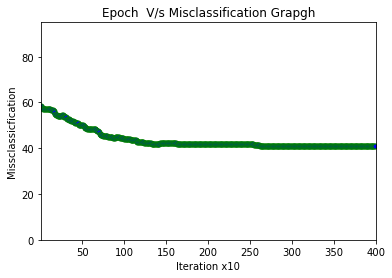

In [30]:
# Error vs Misclassification

print(epoch_vs_Misclassification)
#y = np.arange(100)
y = np.arange(np.array(epoch_vs_Misclassification).shape[0])

plt.plot(y,epoch_vs_Misclassification,  color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=5)
 
# setting x and y axis range
plt.xlim(1,400)
plt.ylim(0,95)
 
# naming the x axis
plt.xlabel('Iteration x10')
# naming the y axis
plt.ylabel('Missclassicfication')
 
# giving a title to my graph
plt.title('Epoch  V/s Misclassification Grapgh')
 
# function to show the plot
plt.show()

###**Plotting Epoch vs Average Error graph**###

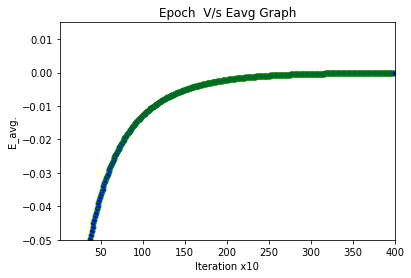

In [31]:
# Epoch vs average error 

y = np.arange(np.array(epoch_vs_Eavg_1).shape[0])

plt.plot(y,epoch_vs_Eavg_1,  color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=5)
 
# plt.plot(y,epoch_vs_Eavg_2,  color='black', linestyle='dashed', linewidth = 3,
#          marker='*', markerfacecolor='red', markersize=5)

plt.plot(color="tab:orange", lw=0.010, label="a line")

# plt.annotate('figure pixels',xy=(10, 10), xycoords='figure pixels')
# setting x and y axis range
plt.xlim(1,400)
plt.ylim(-0.05,0.015)
 
# naming the x axis
plt.xlabel('Iteration x10')
# naming the y axis
plt.ylabel('E_avg.')
 
# giving a title to my graph
plt.title('Epoch  V/s Eavg Graph')
 
# function to show the plot
plt.show()

###**Testing the model on Test Set**###

In [19]:
print("Accuracy on test set:\n")
print(str(test_output(W1, b1, X_test, y_test)*100)+"%")

Accuracy on test set:

58.14%
